# 3. 배깅과 랜덤포레스트
- 이 장에서 XGBoost의 경쟁 도구인 랜덤 포레스트 구축 방법을 익혀 보겠다.
- XGBoost와 마찬가지로 랜덤 포레스트는 결정 트리의 앙상블이다.
- 차이점은 **랜덤 포레스트는 배깅을 통해 트리를 연결하고 XGBoost는 부스팅을 통해 트리를 연결하는 것이다.**
- XGBoost의 대안으로써 랜덤 포레스트의 장점과 단점을 이 장에서 알아보겠다.
- 램덤 포레스트는 트리 기반 앙상블(XGBoost)구조에 값진 통찰을 제공하기 때문에 중요하다.
- 배깅 방식과 비교하고 대조하면 부스팅을 이해하는 데 도움이 된다.


# 3-1. 배깅 앙상블
- 앙상블 모델이 개별 머신러닝 모델보다 일반적으로 더 뛰어난 이유는 무엇일까?
- 또한 배깅 방법에 대해 배우겠다.

## 3-1-1. 앙상블 방법
- 머신러닝에서 앙상블 방법은 개별 모델의 예측을 '합치는' 머신러닝 모델을 말한다.
- 앙상블 방법이 여러 모델의 결과를 연결하기 때문에 오차를 줄이고 더 나은 성능을 내는 경향이 있다.

>예를 들어 어떤 집이 시장에 나온 첫 달만에 팔릴지 예측한다고 상상해보자. 여러 개의 머신러닝 모델을 실행하여 로지스틱 회귀는 80% 정확도,
 결정트리는 75% 정확도, K-최근접 이웃은 77% 정확도를 얻었다고 생각해보자. 가장 정확한 모델인 로지스틱 회귀를 최종 모델로 선택할 수 있다.
 더 나은 방법은 각 모델의 예측을 **합치는 것이다.**
 
- 분류기의 경우 앙상블하는 대표적인 방법은 다수결 투표이다. 세 모델 중 적어도 두개가 첫 번째 달에 집이 팔린다고 예측하면 최종 예측이 yes, 그렇지 않으면 no가 된다.

- 전체적인 정확도는 앙상블 방법을 사용할 때 일반적으로 더 높다.
- 앙상블에서는 예측이 틀리려면 한 모델이 틀리는 것으로는 충분하지 않다. 즉 다수의 분류기가 틀려야한다.

- **앙상블 방법은 크게 두 가지로 분류된다.**
> 첫번째는 사이킷런의 VotingClassifier처럼 사용자가 선택한 여러 종류의 머신러닝 모델을 연결하는 방식이다. 
두번째는 XGBoost나 랜덤 포레스트처럼 같은 종류의 모델을 여러 개 합치는 앙상블이다.

- 랜덤 포레스트는 모든 앙상블 방법 중에서 가장 인기 있고 널리 사용되는 알고리즘이다.
- 랜덤 포레스트의 개별 모델은 2장에서 보았던 결정 트리다. 랜덤 포레스트는 최종 예측을 만들기 위해 수백 또는 수천 개의 결정 트리를 구성할 수 있다.
- 랜덤 포레스트는 분류일 경우 다수결 투표를 사용하고 회귀일 경우 모델의 예측을 평균하지만 개별 트리를 만들기 위해 부스트트랩 애그리게이션의 약자인 배깅이란 특별한 방법을 사용한다.

## 3.1.2 배깅
- 부트스트래핑은 중복을 허용한 샘플링을 의미한다.
> 20개의 색 구슬이 들어 있는 가방을 생각해보자. 한 번에 하나씩 10개의 구슬을 선택하려고 한다. 구슬을 선택할 때마다 이를 가방에 다시 넣는다.
이는 아주 운이 나쁘면 동일한 구슬을 10번 선택할 수 있다는 의미다. 어떤 구슬은 한 번 이상 선택하게 되고 어떤 구슬은 전혀 선택하지 않을 수 있다.
다음은 10개의 구슬을 선택하는 예시다.

- 앞의 그림에서 볼 수 있듯이 부트스트랩 샘플은 중복을 허용한 샘플링으로 만든다. 
- 랜덤 포레스트는 부트스트래핑을 사용한다. 개별 결정 트리를 만들 때 부트스트래핑을 수행한다. 
- 모든 결정 트리가 동일 한 샘플로 만들어진다면 모두 비슷한 예측을 만들게 되고 앙상블한 결과도 개별 트리와 비슷해 질 것이다...
- 랜덤 포레스트는 원본 데이터셋과 같은 크기의 부트스트래핑 샘플을 사용해 각 트리를 만든다.
- 수학적으로 계산하면 평균적으로 각 트리의 샘플은 전체 샘플의 2/3을 포함하여 1/3은 중복된 샘플이다.
- 부트스트래핑 단계 후에 각 결정 트리는 자신만의 예측을 만든다. 이 트리의 예측을 모아서 최종 예측을 만든다.
> 부스팅은 가중치를 달리하고 합치는 것이고 부트스트래핑의 경우 중복 샘플을 만든 후 합친다.

# 3.2 랜덤 포레스트 살펴보기

## 3.2.1 랜덤 포레스트 분류 모델 

In [2]:
# 인구 데이터셋에 랜덤 포레스트 분류기를 만들고 평가 

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [6]:
df_census = pd.read_csv('census_cleaned.csv')
x_census = df_census.iloc[:,:-1]
y_census = df_census.iloc[:,-1]

In [3]:
# 데이터가 준비되었으므로 모델을 만들어보겠다.
# 랜덤포레스트 분류기를 만든다. 실제로 앙상블 알고리즘은 다른 머신러닝 알고리즘과 동일한 방식으로 사용한다.
# 모델을 초기화하고, 훈련 데이터에서 훈련하고, 테스트데이터에서 평가한다.
# 다음과 같은 매개변수로 랜덤 포레스트 모델을 초기화한다.

In [7]:
# n_estimator의 기본값은 100이다. 계산 속도를 높이기위해 10으로 지정한다.( 랜덤 포레스트는 10개의 트리를 사용하기 때문에)

rf = RandomForestClassifier(n_estimators=10, random_state=2, n_jobs= -1)

In [15]:
# 모델, 특성데이터, 타깃데이터, cv는 교차검증 5겹 

scores = cross_val_score(rf, x_census, y_census, cv = 5)

In [17]:
print('정확도:', np.round(scores, 3))
print('정확도 평균: %0.3f' % (scores.mean()))

정확도: [0.849 0.842 0.849 0.852 0.851]
정확도 평균: 0.848


- 음... 좋긴한데 결정트리보다 인구 조사 데이터셋에서 더 나은 점수를 만든다.
- 하지만 1장의 XGBoost만큼은 아니다. 개별 트리보다 성능이 좋은 이유는 무엇일까?
- 성능이 향상된 것은 앞서 말한 배깅(중복을 허용한 샘플링)
- 각 트리는 부트스트래핑 샘플을 사용하므로 다양성이 높아지고 이를 집계하면 분산이 줄어든다.
- 기본적으로 랜덤포레스트 분류기는 노드를 분할할 때 **특성 개수의 제곱근**을 사용한다. 
- 예를 들어 100개의 특성이 있다면 랜덤 포레스트의 각 결정 트리는 분할할 때 10개의 특성만 사용한다.
- 따라서 중복 샘플을 가진 두 트리의 분할이 달라지기 때문에 매우 다른 예측을 만들 수 있다.(분산을 줄이는 방법),,, 분할의 다양성

## 3.2.2 랜덤 포레스트 회귀 모델
- 랜덤 포레스트 회귀 모델은 분류 모델과 마찬가지로 부트스트랩 샘플을 사용하지만 노드 분할에 특성의 제곱근이 아니라 특성 전체를 사용한다.
- 이런 차이는 실험 결과를 바탕으로 한다.이런 차이는 실험 결과를 바탕으로 한다.
- 최종 예측은 다수결 투표가 아니라 모든 트리의 예측을 평균하여 만든다.

In [20]:
df_bikes = pd.read_csv('bike_rentals_cleaned.csv')
df_bikes

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1.0,1.0,12.0,0.0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133,2114
727,728,1.0,1.0,12.0,0.0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471,3095
728,729,1.0,1.0,12.0,0.0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383,1341
729,730,1.0,1.0,12.0,0.0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754,1796


In [23]:
x_bikes = df_bikes.iloc[:,:-1]
y_bikes = df_bikes.iloc[:,-1] 

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10, random_state=2, n_jobs= -1)

In [24]:
scores = cross_val_score(rf, x_bikes, y_bikes, scoring= 'neg_mean_squared_error', cv=10)

In [25]:
rmse = np.sqrt(-scores)
print('RMSE', np.round(rmse, 3))
print('RMSE 평균: %0.3f' %  (rmse.mean()))

RMSE [ 801.486  579.987  551.347  846.698  895.05  1097.522  893.738  809.284
  833.488 2145.046]
RMSE 평균: 945.365


# 3.3 랜덤 포레스트 매개변수
## 3.3.1 oob_score

- 첫번째이자 가장 흥미로운 매개변수는 oob_score이다.
- 랜덤 포레스트는 중복을 허용한 샘플링인 배깅을 통해 결정 트리를 만든다. 모든 샘풀 중에 일부 샘플은 선택되지 않고 남아있는다.
- 이런 샘플을 테스트 세트로 사용할 수 있다. **oob_score = True**로 설정하면 랜덤 포레스트 모델을 훈련한 후 각 트리에서 사용되지 않은 샘플을 사용해 개별 트리의 예측 점수를 누적하여 평균을 낸다.
- 다른 말로 하면 oob_score 매개변수는 테스트 점수의 대안을 제공한다. 모델을 훈련한 후 oob점수를 바로 출력할 수 있다.
- 인구 조사 데이터셋에 oob_score 매개변수를 적용해보겠다. oob_score 매개변수를 사용하여 모델을 테스트하기 때문에 **여기에서는 편의상 데이터를 훈련세트와 테스트 세트로 나누지않겠다.**

In [48]:
rf = RandomForestClassifier(oob_score = True, n_estimators= 10, random_state=2, n_jobs = -1)

In [49]:
rf.fit(x_census, y_census)

RandomForestClassifier(n_estimators=10, n_jobs=-1, oob_score=True,
                       random_state=2)

In [50]:
rf.oob_score_

0.8337274653726852

## 3.3.2 n_estimators
- 랜덤 포레스트는 많은 트리를 앙상블했을 때 강력한 성능을 발휘한다.
- 얼마나 많아야 할까?
- 한번 봐보자 

In [51]:
rf = RandomForestClassifier(n_estimators=50, oob_score = True, random_state=2, n_jobs = -1)
rf.fit(x_census, y_census)
rf.oob_score_

0.8524615337366789

## 3.3.3 warm_start
- **warm_start 매개변수는 랜덤 포레스트의 트리 개수(n_estimators)를 결정하는 데 도움이 된다.**
- warm_start = True로 지정하면 처음부터 시작하지 않고 트리를 앙상블에 추가할 수 있다.
- n_estimator를 100에서 200으로 바꾸면 200개의 트리를 가진 랜덤 포레스트를 만드는 데 두 배 더 오래 걸린다. warm_start = True로 지정하면 처음부터 200개의 트리를 다시 만들지 않고 이전 모델에 이어서 트리를 추가한다.
- warm_start 매개변수를 사용해 n_estimators에 따라 oob 점수의 변화를 그래프로 그릴 수 있다.

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [61]:
oob_scores = []
rf = RandomForestClassifier(n_estimators=50, warm_start=True, oob_score=True, n_jobs = -1, random_state=2)

In [62]:
rf.fit(x_census,y_census)
oob_scores.append(rf.oob_score_)

In [63]:
est = 50
estimators = [est]

In [68]:
for i in range(9):
    est += 100
    estimators.append(est)
    rf.set_params(n_estimators = est)
    rf.fit(x_census, y_census)
    oob_scores.append(rf.oob_score_)

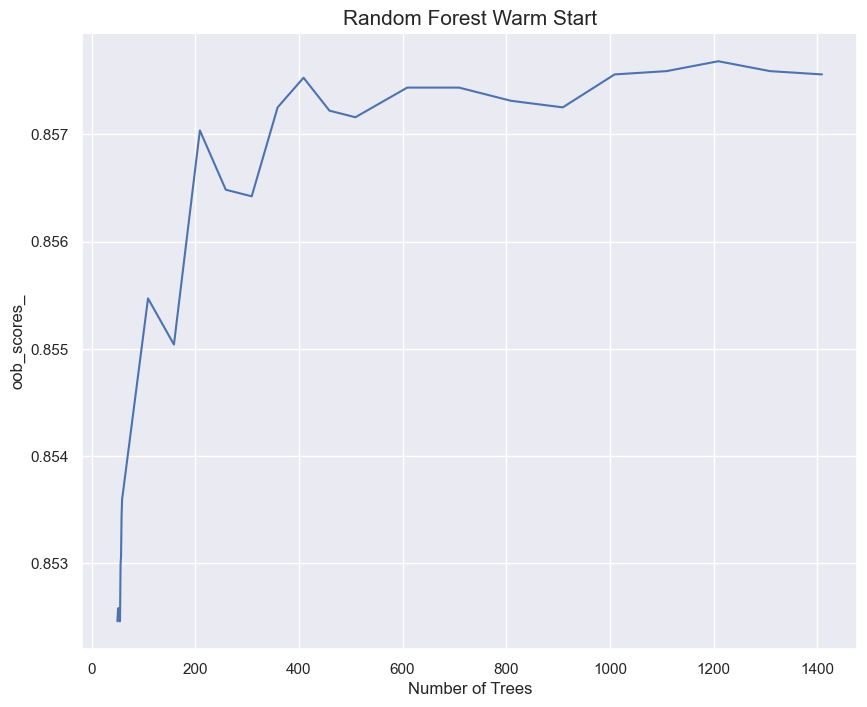

In [69]:
plt.figure(figsize = (10,8))
plt.plot(estimators, oob_scores)
plt.xlabel('Number of Trees')
plt.ylabel('oob_scores_')
plt.title('Random Forest Warm Start', fontsize = 15)
plt.show()

## 3.3.4 bootstrap
- 랜덤 포레스트는 일반적으로 부트스트래핑을 사용하지만 bootstrap 매개변수를 False로 지정할 수도 있다. 
- bootstrap = False로 지정하면 oob_score_속성이 만들어지지 않는다. oob점수는 부트스트래핑되지 않은 샘플로 계산되기 때문이다.(중복하고 남은)
- 잘 사용하지 않는다.

## 3.3.6 결정 트리 매개변수
- 남은 매개변수는 모두 결정 트리에서 온 것이다.
- 랜덤 포레스트 구조 자체가 분산을 줄이도록 고안되었기 때문에 결정 트리 매개변수가 랜덤 포레스트에서 아주 중요하지는 않다.

### 트리 깊이
- Max_depth: 언제나 튜닝의 대상이다. 트리의 분할 횟구를 결정한다. 트리의 깊이라고도 부르며 분산을 줄이는 좋은 방법이다.

### 분할
- max_features: 분할에 사용할 특성 개수를 제한한다.
- min_sample_split: 분할에 필요한 최소 샘플 개수를 지정한다.
- min_impurity_decrease: 분할에 필요한 최소 불순도 감소량을 지정한다.

### 리프노드
- min_samples_leaf: 리프 노드가 되기 위해 필요한 최소 샘플 개수를 지정한다.
- min_weight_fraction_leaf: 리프 노드가 되기 위한 전체 가중치에 대한 최소 비율을 지정한다.

# 3.4 랜덤 포레스트 성능 높이기 - 사례연구
- 자전거 대여 회사를 위해 날씨, 시간, 일자를 기반으로 일별 대여 횟수를 예측한다고 가정
- 이 장 초반에 랜덤 포레스트 회귀 모델을 만들어 교차 검증으로 RMSE 점수 945를 얻었다. 튜닝하여 가능한 더 낮은 점수..

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x_bikes, y_bikes, random_state= 2)

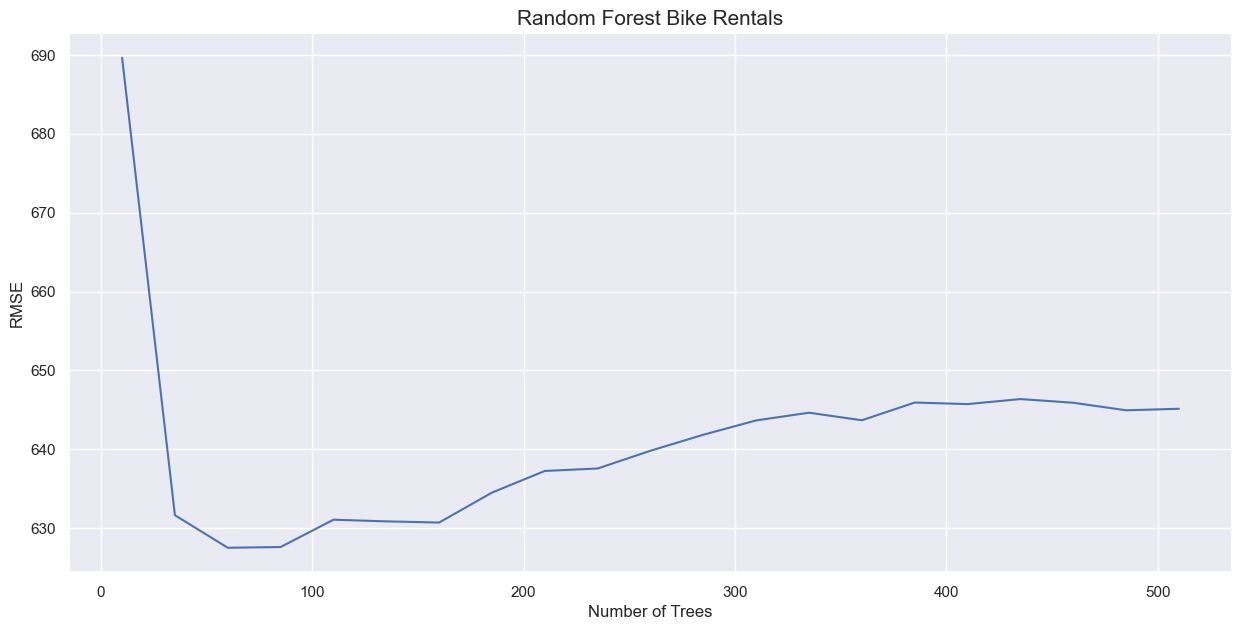

In [79]:
# n_estimators 값을 사용해 만든 RMSE 그래프

from sklearn.metrics import mean_squared_error

# MSE 점수와 트리 개수를 담을 리스트
rmse_scores = []
estimators = []

# warm_start=True로 RandomForestRegressor 객체를 만듭니다.
rf = RandomForestRegressor(warm_start=True, n_jobs=-1, random_state=2)

# 시작 트리 개수
est = 10

# 0~19까지 반복합니다.
for i in range(21):
    
    # n_estimators를 est로 설정합니다.
    rf.set_params(n_estimators=est)
    
    # 인구 조사 데이터셋으로 훈련합니다.
    rf.fit(x_train, y_train)
    
    # RMSE 값을 계산합니다.
    rmse = mean_squared_error(y_test, rf.predict(x_test), squared=False)
    
    # rmse와 est를 리스트에 추가합니다.
    rmse_scores.append(rmse)
    estimators.append(est)
    
    # 트리를 25개씩 늘립니다.
    est += 25

# 그래프 크기를 설정합니다.
plt.figure(figsize=(15,7))

# estimators와 rmse_scores를 그래프로 그립니다.
plt.plot(estimators, rmse_scores)

# 축 레이블을 설정합니다.
plt.xlabel('Number of Trees')
plt.ylabel('RMSE')

# 제목을 출력합니다.
plt.title('Random Forest Bike Rentals', fontsize=15)

# 그래프를 출력합니다.
plt.show()

# 3.4.1 croos_val_score
- 이전 그래프를 보면 RMSE 범위가 620에서 690사이다. cross_val_score()함수로 이 데이터셋에 대해 교차 검증을 수행해보겠다.
- 교차 검증은 훈련 데이터를 K 개의 폴드로 나누고 반복마다 번갈아 가며 하나의 폴드를 테스트 세트로 사용한다.
- 교차 검증 함수는 훈련된 모델을 반환하지 않기 때문에 oob_score_속성을 사용할 수 없다.

In [76]:
# 1. 모델 초기화 2. 모델, 특성, 타깃, 특싱 지표, 폴드 개수로 cross_Val_score() 함수 호출 3.RMSE 계산  4. 교차 검증 점수와 평균 출력 

In [80]:
rf = RandomForestRegressor(n_estimators = 50, warm_start = True, n_jobs = -1, random_state =2)
scores = cross_val_score(rf, x_bikes, y_bikes, scoring = 'neg_mean_squared_error', cv = 10)

rmse = np.sqrt(-scores)
print("RMSE:", np.round(rmse,3))
print("RMSE 평균: %0.3f" % (rmse.mean()))

# 마지막 폴드의 에러가 매우 높다. 이는 데이터에 있는 오류나 이상치때문이다.

RMSE: [ 836.482  541.898  533.086  812.782  894.877  881.117  794.103  828.968
  772.517 2128.148]
RMSE 평균: 902.398


# 하이퍼파라미터 튜닝
- 이제 RandomizedSearchCV로 하이퍼파라미터 튜닝을 수행해보겠다. 다음은 RandomizedSearchCV를 사용해 최상의 매개변수와 RMSE, 평균 점수를 출력하는 함수다.

In [88]:
from sklearn.model_selection import RandomizedSearchCV
def randomized_search_reg(params, runs = 16,
                             reg = RandomForestRegressor(random_state = 2, n_jobs = -1)):
    rand_reg = RandomizedSearchCV(reg,params, n_iter = runs, scoring = 'neg_mean_squared_error', cv = 10,
                                 n_jobs = -1, random_state=2)
    rand_reg.fit(x_train, y_train)
    best_model = rand_reg.best_estimator_
    best_params = rand_reg.best_params_
    print("최상의 매개변수:", best_params)
    best_score = np.sqrt(-rand_reg.best_score_)
    print("훈련 점수: {:3f}".format(best_score))
    y_pred = best_model.predict(x_test)
    from sklearn.metrics import mean_squared_error as mse
    rmse_test = mse(y_test, y_pred)**0.5
    print('테스트 세트 점수: {:.3f}'.format(rmse_test))
    

In [89]:
# 초기 매개변수 그리드로 랜더마이즈 호출 

randomized_search_reg(
    params={'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05],
            'min_samples_split':[2, 0.01, 0.02, 0.03, 0.04, 0.06, 0.08, 0.1],
            'min_samples_leaf':[1,2,4,6,8,10,20,30],
            'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
            'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
            'max_features':['sqrt', 0.8, 0.7, 0.6, 0.5, 0.4],
            'max_depth':[None,2,4,6,8,10,20]})

최상의 매개변수: {'min_weight_fraction_leaf': 0.0, 'min_samples_split': 0.03, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.05, 'max_leaf_nodes': 25, 'max_features': 0.7, 'max_depth': None}
훈련 점수: 759.075619
테스트 세트 점수: 701.802


- 945에 비하면 상당히 성능이 향상된 것을 볼 수 있다. **탐색 범위를 좁혀보자**

In [96]:
randomized_search_reg(
    params={'min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30],
            'min_impurity_decrease': [0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
            'max_features': ['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
            'max_depth': [None, 4, 6, 8, 10, 12, 15, 20]},
    runs=20
)


/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

최상의 매개변수: {'min_samples_leaf': 1, 'min_impurity_decrease': 0.1, 'max_features': 0.6, 'max_depth': 12}
훈련 점수: 675.128005
테스트 세트 점수: 619.014


- 점수가 다시 더 좋아졌다. 이전 결과를 바탕으로 범위를 더 좁혀보자.

In [101]:
randomized_search_reg (
    params= {'min_samples_leaf': [1,2,3,4,5,6], # 2번의 실험결과 1,6이나옴
             'min_impurity_decrease': [0.0, 0.01, 0.05, 0.10, 0.15, 0.2], # 2번 실험결과 0.05와 0.1이 나옴
             'max_features': ['auto',0.8,0.7,0.6,0.5,0.4],
             'max_depth': [None, 8,10,12,14,16,18,20]})
        

/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

최상의 매개변수: {'min_samples_leaf': 1, 'min_impurity_decrease': 0.15, 'max_features': 0.7, 'max_depth': 20}
훈련 점수: 678.869919
테스트 세트 점수: 631.256


- 갑자기 별로 안좋아짐
- n_estimators를 증가시켜보자.
- 랜덤 포레스트에 트리를 더 추가할수록 성능이 조금 향상될 가능성이 높아진다.

In [103]:
randomized_search_reg(
    params={'min_samples_leaf':[1,2,4,6,8,10,20,30],
            'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
            'max_features':['sqrt', 0.8, 0.7, 0.6, 0.5, 0.4],
            'max_depth':[None,4,6,8,10,12,15,20],
            'n_estimators':[100]}, 
    runs=20)

최상의 매개변수: {'n_estimators': 100, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.1, 'max_features': 0.6, 'max_depth': 12}
훈련 점수: 675.128005
테스트 세트 점수: 619.014


- 마지막은 교차검증으로 최상의 모델의 결과를 확인해본다.

In [107]:
rf = RandomForestRegressor(n_estimators = 100, min_impurity_decrease= 0.1,
                           max_features = 0.6, max_depth = 12, n_jobs = -1,
                           random_state = 2)
scores = cross_val_score(rf, x_bikes, y_bikes,
                        scoring = 'neg_mean_squared_error', cv = 10)
rmse = np.sqrt(-scores)
print('RMSE:', np.round(rmse,3))
print('RMSE 평균: %0.3f'% (rmse.mean()))

RMSE: [ 818.354  514.173  547.392  814.059  769.54   730.025  831.376  794.634
  756.83  1595.237]
RMSE 평균: 817.162


- 아놔 점수가 다시 올라갔다. 903보다는 훨씬 좋은 점수지만 619보다는 훨씬 나쁘다 무슨일이 일어난 것일까?
- cross_val_score()의 마지막 점수가 다른 것보다 두 배나 높기 때문에 마지막 분할에 문제가 있다.
- 데이터를 섞어서 도움이 되는지 확인해보겠다. 

In [108]:
from sklearn.utils import shuffle

In [112]:
df_shuffle_bikes = shuffle(df_bikes, random_state = 2)

In [116]:
x_shuffle_bikes = df_shuffle_bikes.iloc[:,:-1]
y_shuffle_bikes = df_shuffle_bikes.iloc[:, -1]

rf = RandomForestRegressor(n_estimators = 100, min_impurity_decrease= 0.1,
                           max_features = 0.6, max_depth = 12, n_jobs = -1,
                           random_state = 2)
scores = cross_val_score(rf, x_shuffle_bikes, y_shuffle_bikes, scoring = 'neg_mean_squared_error', cv = 10)
rmse = np.sqrt(-scores)
print('RMSE', np.round(rmse, 3))
print('RMSE 평균: %0.3f' % (rmse.mean()))

RMSE [630.093 686.673 468.159 526.676 593.033 724.575 774.402 672.63  760.253
 616.797]
RMSE 평균: 645.329


- 데이터를 섞으면 마지막 교차 검증 점수에 문제가 없어졌고 기대한 대로 점수가 훨씬 좋아졌다.

# 랜덤 포레스트 단점
- 결국 랜덤 포레스트는 개별 트리에 제약이 된다.
- 모든 트리가 동일한 실수를 저지르면 랜덤 포레스트도 실수를 한다.
- 앞의 사례 연구에서 데이터를 섞기 전에 이런 경우가 나타났다.
- 개별 트리 내의 문제 때문에 랜덤 포레스트의 성능이 향상될 수 없었다.
- 트리의 실수로부터 배워서 초반의 단점을 개선할 수 있는 앙상블 방법이 도움이 될 수 있따. 부스팅은 트리가 저지른 실수에서 배우도록 설계되었다.
- 다음 장의 주제인 그레이디언트 부스팅이 이 주제를 다룬다.

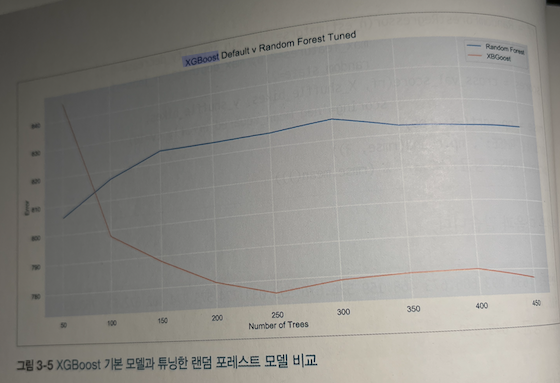

- 여기서 볼 수 있듯이 XGBoost는 트리가 늘어날수록 훨씬 더 좋은 성능을 낸다. 심지어 XGBoost 모델은 튜닝을 하지도 않았습니다.

### 마치며
>이 장에서 앙상블 방법의 중요성에 대해 배웠다. 특히 부트스트래핑, 중복을 허용한 샘플링을 사용해 여러 모델을 연결하며 하나의 모델을 만드는 배깅에 대해 배웠다. 랜덤 포레스트 분류 모델과 회귀 모델을 만들어보았다. warm_start 매개변수로 n_estimators를 조절하고 oob_score_점수를 사용해 오차를 측정했다.
그다음 랜덤 포레스트 매개변수를 튜닝해보았다. 마지막으로 랜덤포레스트는 데이터를 섞은 후 훌륭한 결과를 냈지만 데이터를 섞지 않으면 XGBoost만큼 좋은 결과를 얻지 못한다. 

### 앞으로 나아갈 방향은?
> 트리를 추가함에 따라 실수에 대해 학습하여 정확도를 향상시키는 앙상블 방법인 부스팅 알고리즘을 배우겠다. 그레이디언트 부스팅 모델을 구현하여 예측을 만들어 봄으로써 익스트림 그레이디언트 부스팅의 약자인 XGBoost의 기초를 마련하겠다.